In [26]:
%matplotlib inline
import os
import sys
from ray.tune import Analysis
import numpy as np
import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})



# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TRAIN_RESULTS_PATH

In [27]:
evaluation_infos = {
    0: {
        'series': 121,
        'cluster_id': 21,
        'legend': 'DAN_p',
        'experiment_id': 0,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
        },
    1: {
        'series': 121,
        'cluster_id': 21,
        'legend': 'DAN_g',
        'experiment_id': 1,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
        },
    2: {
        'series': 121,
        'cluster_id': 21,
        'legend': 'DAN_balance',
        'experiment_id': 2,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        },
    3: {
        'series': 121,
        'cluster_id': 17,
        'legend': 'DAN_p',
        'experiment_id': 0,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
        },
    4: {
        'series': 121,
        'cluster_id': 17,
        'legend': 'DAN_g',
        'experiment_id': 1,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
        },
    5: {
        'series': 121,
        'cluster_id': 17,
        'legend': 'DAN_balance',
        'experiment_id': 2,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        },
    6: {
        'series': 121,
        'cluster_id': 22,
        'legend': 'DAN_p',
        'experiment_id': 0,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
        },
    7: {
        'series': 121,
        'cluster_id': 22,
        'legend': 'DAN_g',
        'experiment_id': 1,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
        },
    8: {
        'series': 121,
        'cluster_id': 22,
        'legend': 'DAN_balance',
        'experiment_id': 2,
        'algorithm': 'DQN',
        'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        }
    # 9: {
    #     'series': 121,
    #     'cluster_id': 20,
    #     'legend': 'DAN_p',
    #     'experiment_id': 0,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'PG_SimSchedulerEnv_f48b8_00000_0_2023-01-17_02-02-11'
    #     },
    # 10: {
    #     'series': 121,
    #     'cluster_id': 20,
    #     'legend': 'DAN_g',
    #     'experiment_id': 1,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'PG_SimSchedulerEnv_173d5_00000_0_2023-01-17_02-03-09'
    #     },
    # 11: {
    #     'series': 121,
    #     'cluster_id': 20,
    #     'legend': 'DAN_balance',
    #     'experiment_id': 2,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
        # 'trial': 'PG_SimSchedulerEnv_2095d_00000_0_2023-01-17_02-03-25'
        # },
    # 9: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_cv',
    #     'experiment_id': 0,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_4ae9d_00000_0_2023-01-26_19-19-02'
    #     },
    # 10: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_p',
    #     'experiment_id': 1,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_63d00_00000_0_2023-01-26_19-19-44'
    #     },
    # 11: {
    #     'series': 70,
    #     'cluster_id': 13,
    #     'legend': 'DQN_balance',
    #     'experiment_id': 2,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     # 'trial': 'DQN_SimSchedulerEnv_7c1e9_00000_0_2023-01-26_19-20-25'
    #     },
}

In [28]:
def load_experiments(series, cluster_id, legend, experiment_id, workload_id, algorithm):
    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH,
        "series",      str(series),
        "envs",        'sim-scheduler',
        "clusters",    str(cluster_id),
        "workloads",   str(workload_id),
        "experiments", str(experiment_id),
        str(algorithm))
    trial = [ name for name in os.listdir(experiment_folder_path) if os.path.isdir(os.path.join(experiment_folder_path, name)) ][0]
    experiment_folder_path = os.path.join(experiment_folder_path, trial)
    analysis = Analysis(experiment_folder_path)
    df = analysis.trial_dataframes[experiment_folder_path]
    with open(
        os.path.join(
            experiment_folder_path, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    # episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
    experiment_json = {}
    # TODO also load the df and do from scrath with the goal of replicating the tensorboard results
    for line, iteration in enumerate(result):
        if iteration != '':
            experiment_json[line] = json.loads(iteration)
    # replace rewards with new ones
    selected_stats = [
        'episode_reward_mean',
        # 'episodes_this_iter',
        'timesteps_total',
        # 'custom_metrics/scheduling_timestep_avg_mean',
        # 'custom_metrics/scheduling_success_avg_mean',
        'custom_metrics/num_consolidated_avg_mean',
        # 'custom_metrics/num_overloaded_avg_mean',
        # 'custom_metrics/time_mean',
        'custom_metrics/timestep_episode_mean',
        'custom_metrics/reward_u_mean',
        'custom_metrics/reward_cv_mean',
        'custom_metrics/reward_g_mean',
        # 'custom_metrics/reward_v_mean',
        # 'custom_metrics/reward_g_mean',
        'custom_metrics/reward_p_mean',
        'time_total_s']
    experiment_df = df[selected_stats]
    return legend, cluster_id, experiment_df, experiment_json


experiments_df = {}
experiments_json = {}
# episodes_rewards = []
for evaluation_id, evaluation_info in evaluation_infos.items():
    legend, cluster_id, experiment_df, experiment_json = load_experiments(**evaluation_info)
    experiments_json[evaluation_id] = experiment_json
    experiments_df[evaluation_id] = experiment_df

In [29]:
experiments_df

{0:      episode_reward_mean  timesteps_total  \
 0              18.691358             1005   
 1              12.152047             2007   
 2              16.321429             3009   
 3              16.700000             4011   
 4              19.110000             5016   
 ..                   ...              ...   
 295           140.263333           296779   
 296           140.760000           297781   
 297           144.093333           298783   
 298           146.500000           299788   
 299           143.950000           300790   
 
      custom_metrics/num_consolidated_avg_mean  \
 0                                    0.560741   
 1                                    0.364561   
 2                                    0.489643   
 3                                    0.501000   
 4                                    0.573300   
 ..                                        ...   
 295                                  4.207900   
 296                                  4.245

In [30]:
experiment_id = 1
dataframe = 'custom_metrics/num_consolidated_avg_mean'
dataframe = experiments_df[experiment_id]
dataframe


,episode_reward_mean,timesteps_total,custom_metrics/num_consolidated_avg_mean,custom_metrics/timestep_episode_mean,custom_metrics/reward_u_mean,custom_metrics/reward_cv_mean,custom_metrics/reward_g_mean,custom_metrics/reward_p_mean,time_total_s
0,-284.766812,1005,0.560741,100.0,1.637443,2.847668,0.252724,0.186914,7.598849
1,-260.923054,2007,0.389298,100.0,1.773950,2.609231,0.259042,0.129766,24.271360
2,-257.012701,3009,0.377976,100.0,1.750330,2.570127,0.258367,0.125992,40.089077
3,-291.284004,4011,0.298900,100.0,1.861406,2.912840,0.262227,0.099633,56.224310
4,-320.152215,5016,0.277100,100.0,1.891523,3.201522,0.261795,0.092367,72.455764
...,...,...,...,...,...,...,...,...,...
295,-222.202243,296626,1.513200,100.0,1.151237,2.222022,0.165231,0.504400,5249.256578
296,-236.101402,297631,1.425500,100.0,1.191867,2.361014,0.166836,0.475167,5266.116343
297,-258.043102,298636,1.408500,100.0,1.204003,2.580431,0.173715,0.469500,5283.488596
298,-267.899345,299636,1.403900,100.0,1.199056,2.678993,0.178189,0.467967,5300.802522


# Training Reward

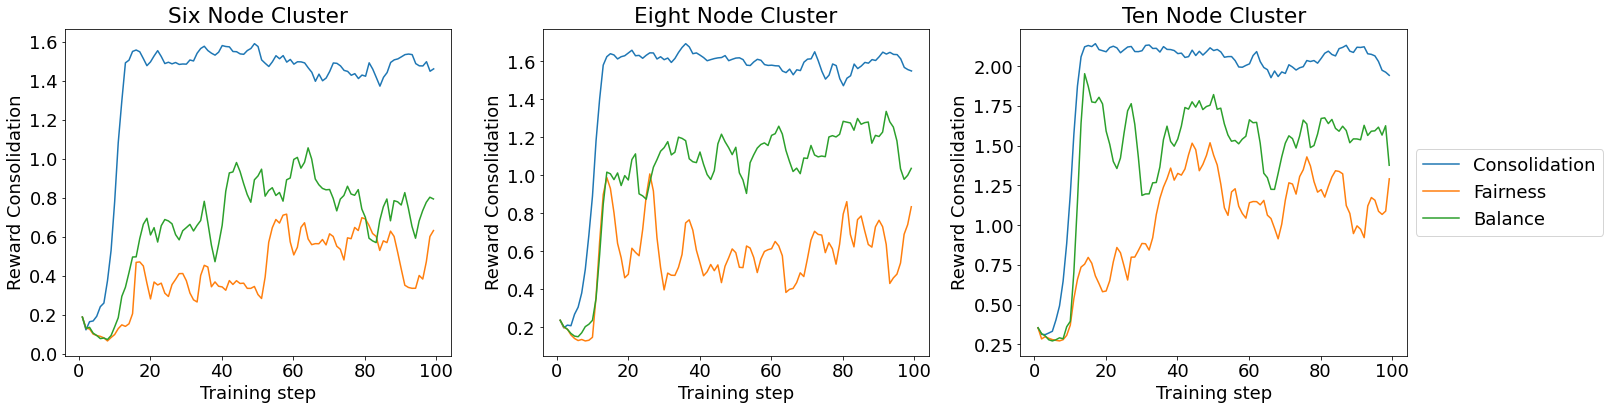

In [31]:
reward = 'custom_metrics/reward_p_mean'
data = {
    'Six Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        },
    'Eight Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[3][reward].tolist(),
            'timesteps': experiments_df[3]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[4][reward].tolist(),
            'timesteps': experiments_df[4]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[5][reward].tolist(),
            'timesteps': experiments_df[5]['timesteps_total'].tolist()
            },
        },
    'Ten Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        },
    # '32 Node Cluster' : {
    #     'Consolidation': {
    #         'metric': experiments_df[9][reward].tolist(),
    #         'timesteps': experiments_df[9]['timesteps_total'].tolist()
    #         },
    #     # 'PG': {
    #     #     'metric': experiments_df[5][reward].tolist(),
    #     #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
    #     #     },
    #     'Fairness': {
    #         'metric': experiments_df[10][reward].tolist(),
    #         'timesteps': experiments_df[10]['timesteps_total'].tolist()
    #         },
    #     'Balance': {
    #         'metric': experiments_df[11][reward].tolist(),
    #         'timesteps': experiments_df[11]['timesteps_total'].tolist()
    #         },
    #     }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 100000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps/1000, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='Training step', ylabel='Reward Consolidation')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
fig.tight_layout(pad=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()
plt.savefig('reward_consolidation.pdf', bbox_inches='tight')


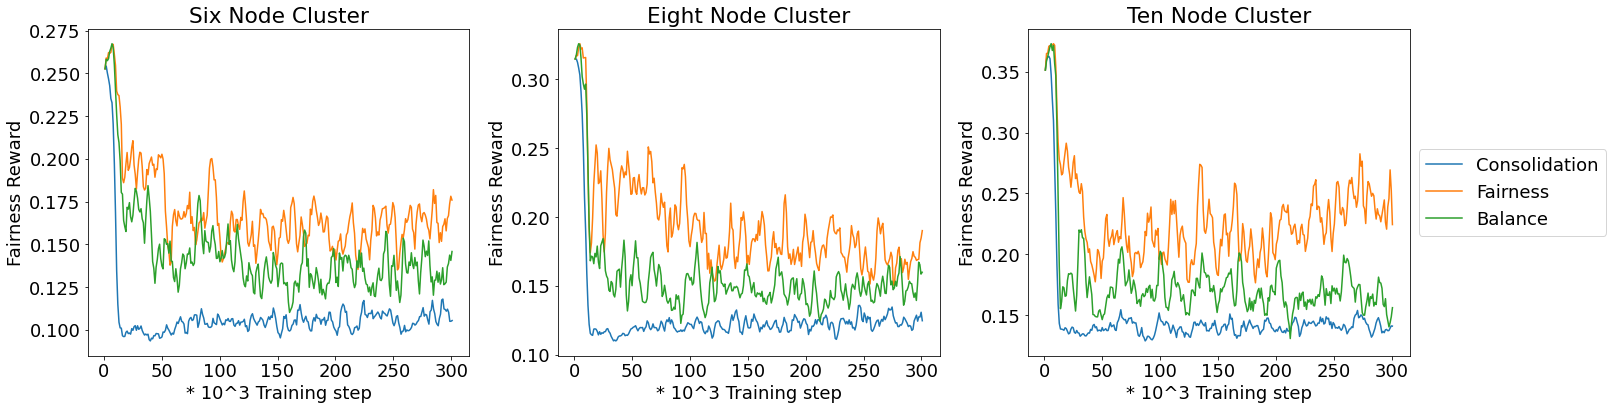

In [32]:
reward = 'custom_metrics/reward_g_mean'
data = {
    'Six Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        },
    'Eight Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[3][reward].tolist(),
            'timesteps': experiments_df[3]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[4][reward].tolist(),
            'timesteps': experiments_df[4]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[5][reward].tolist(),
            'timesteps': experiments_df[5]['timesteps_total'].tolist()
            },
        },
    'Ten Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        },
    # '32 Node Cluster' : {
    #     'Consolidation': {
    #         'metric': experiments_df[9][reward].tolist(),
    #         'timesteps': experiments_df[9]['timesteps_total'].tolist()
    #         },
    #     # 'PG': {
    #     #     'metric': experiments_df[5][reward].tolist(),
    #     #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
    #     #     },
    #     'Fairness': {
    #         'metric': experiments_df[10][reward].tolist(),
    #         'timesteps': experiments_df[10]['timesteps_total'].tolist()
    #         },
    #     'Balance': {
    #         'metric': experiments_df[11][reward].tolist(),
    #         'timesteps': experiments_df[11]['timesteps_total'].tolist()
    #         },
    #     }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 10000000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps/1000, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='* 10^3 Training step', ylabel='Fairness Reward')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
fig.tight_layout(pad=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()
plt.savefig('reward_g.pdf', bbox_inches='tight')


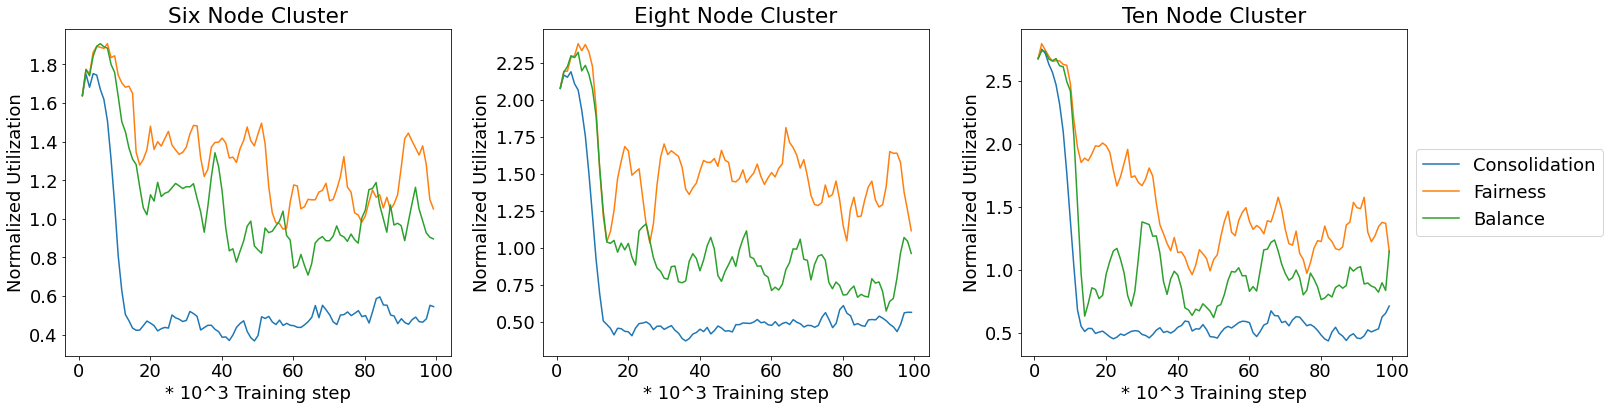

<Figure size 432x288 with 0 Axes>

In [33]:
reward = 'custom_metrics/reward_u_mean'
data = {
    'Six Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        },
    'Eight Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[3][reward].tolist(),
            'timesteps': experiments_df[3]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[4][reward].tolist(),
            'timesteps': experiments_df[4]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[5][reward].tolist(),
            'timesteps': experiments_df[5]['timesteps_total'].tolist()
            },
        },
    'Ten Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        },
    # '32 Node Cluster' : {
    #     'Consolidation': {
    #         'metric': experiments_df[9][reward].tolist(),
    #         'timesteps': experiments_df[9]['timesteps_total'].tolist()
    #         },
    #     # 'PG': {
    #     #     'metric': experiments_df[5][reward].tolist(),
    #     #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
    #     #     },
    #     'Fairness': {
    #         'metric': experiments_df[10][reward].tolist(),
    #         'timesteps': experiments_df[10]['timesteps_total'].tolist()
    #         },
    #     'Balance': {
    #         'metric': experiments_df[11][reward].tolist(),
    #         'timesteps': experiments_df[11]['timesteps_total'].tolist()
    #         },
    #     }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 100000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps/1000, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='* 10^3 Training step', ylabel='Normalized Utilization')
    # ax.set_ylim([0,1])
fig.tight_layout(pad=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.savefig('utilization.pdf', bbox_inches='tight')

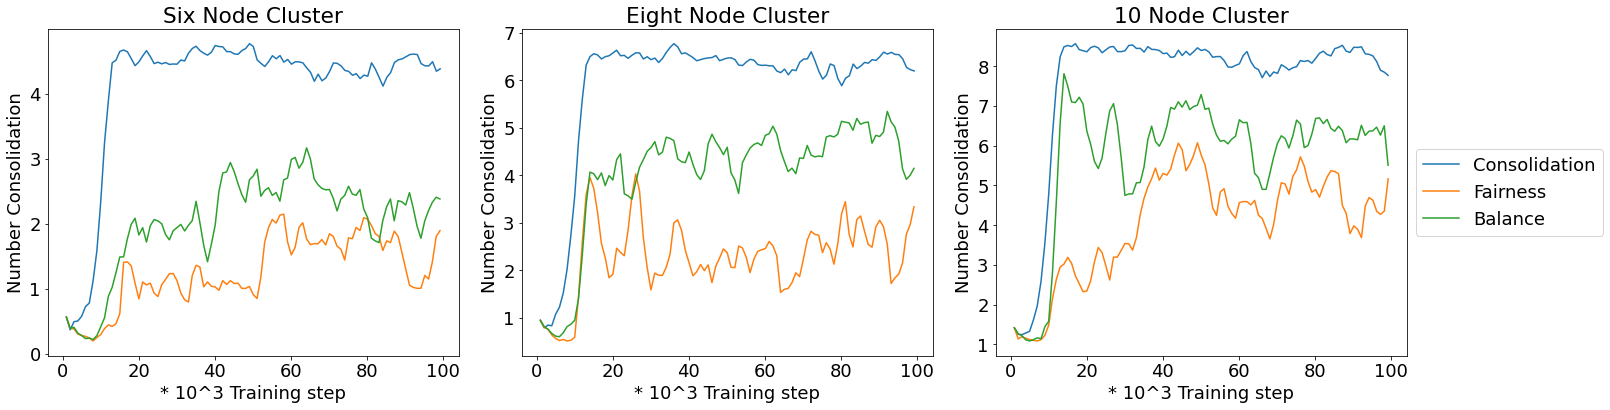

In [34]:
reward = 'custom_metrics/num_consolidated_avg_mean'
data = {
    'Six Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        },
    'Eight Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[3][reward].tolist(),
            'timesteps': experiments_df[3]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[4][reward].tolist(),
            'timesteps': experiments_df[4]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[5][reward].tolist(),
            'timesteps': experiments_df[5]['timesteps_total'].tolist()
            },
        },
    'Ten Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        },
    # '32 Node Cluster' : {
    #     'Consolidation': {
    #         'metric': experiments_df[9][reward].tolist(),
    #         'timesteps': experiments_df[9]['timesteps_total'].tolist()
    #         },
    #     # 'PG': {
    #     #     'metric': experiments_df[5][reward].tolist(),
    #     #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
    #     #     },
    #     'Fairness': {
    #         'metric': experiments_df[10][reward].tolist(),
    #         'timesteps': experiments_df[10]['timesteps_total'].tolist()
    #         },
    #     'Balance': {
    #         'metric': experiments_df[11][reward].tolist(),
    #         'timesteps': experiments_df[11]['timesteps_total'].tolist()
    #         },
    #     }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 100000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps/1000, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='* 10^3 Training step', ylabel='Number Consolidation')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
fig.tight_layout(pad=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()
plt.savefig('num_consolidation.pdf', bbox_inches='tight')


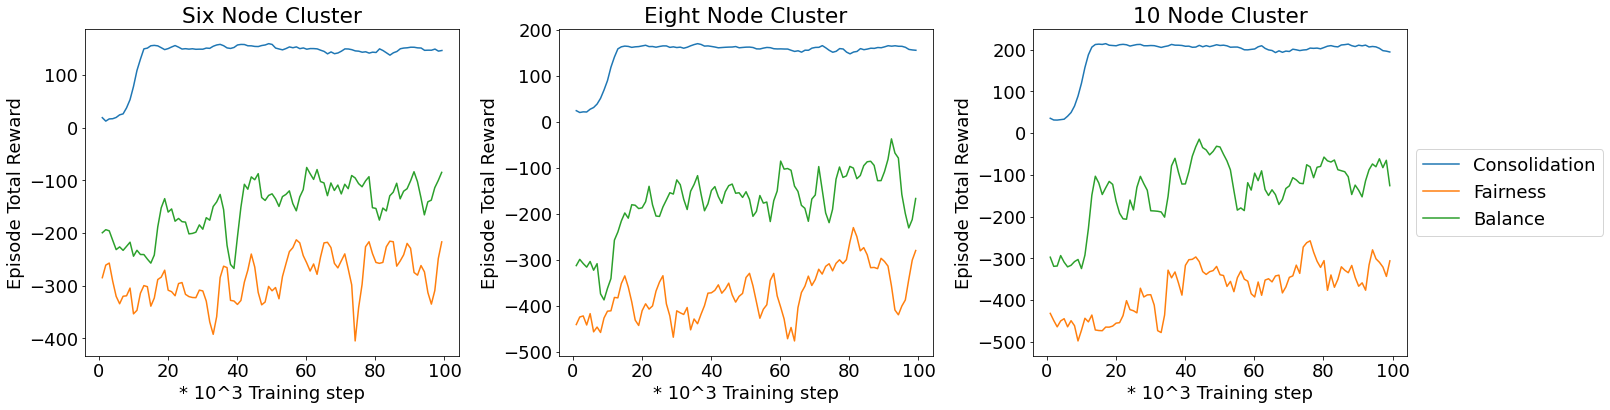

In [35]:
reward = 'episode_reward_mean'
data = {
    'Six Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[0][reward].tolist(),
            'timesteps': experiments_df[0]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[3][reward].tolist(),
        #     'timesteps': experiments_df[3]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[1][reward].tolist(),
            'timesteps': experiments_df[1]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[2][reward].tolist(),
            'timesteps': experiments_df[2]['timesteps_total'].tolist()
            },
        },
    'Eight Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[3][reward].tolist(),
            'timesteps': experiments_df[3]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[4][reward].tolist(),
        #     'timesteps': experiments_df[4]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[4][reward].tolist(),
            'timesteps': experiments_df[4]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[5][reward].tolist(),
            'timesteps': experiments_df[5]['timesteps_total'].tolist()
            },
        },
    'Ten Node Cluster' : {
        'Consolidation': {
            'metric': experiments_df[6][reward].tolist(),
            'timesteps': experiments_df[6]['timesteps_total'].tolist()
            },
        # 'PG': {
        #     'metric': experiments_df[5][reward].tolist(),
        #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
        #     },
        'Fairness': {
            'metric': experiments_df[7][reward].tolist(),
            'timesteps': experiments_df[7]['timesteps_total'].tolist()
            },
        'Balance': {
            'metric': experiments_df[8][reward].tolist(),
            'timesteps': experiments_df[8]['timesteps_total'].tolist()
            },
        },
    # '32 Node Cluster' : {
    #     'Consolidation': {
    #         'metric': experiments_df[9][reward].tolist(),
    #         'timesteps': experiments_df[9]['timesteps_total'].tolist()
    #         },
    #     # 'PG': {
    #     #     'metric': experiments_df[5][reward].tolist(),
    #     #     'timesteps': experiments_df[5]['timesteps_total'].tolist()
    #     #     },
    #     'Fairness': {
    #         'metric': experiments_df[10][reward].tolist(),
    #         'timesteps': experiments_df[10]['timesteps_total'].tolist()
    #         },
    #     'Balance': {
    #         'metric': experiments_df[11][reward].tolist(),
    #         'timesteps': experiments_df[11]['timesteps_total'].tolist()
    #         },
    #     }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, d in zip(axes, data.items()):
    priority = d[0]
    plot_data = d[1]
    for key in plot_data:
        to_select_timesteps = 100000
        timesteps = np.array(plot_data[key]['timesteps'])
        timesteps = timesteps[timesteps<to_select_timesteps]
        length = len(timesteps)
        metric = np.array(plot_data[key]['metric'])
        metric = metric[0:length]
        ax.plot(timesteps/1000, metric, label=key)
    ax.set_title(priority)
    ax.set(xlabel='* 10^3 Training step', ylabel='Episode Total Reward')
    # ax.set_ylim([0,1])
    # Add a legend and show the plot
fig.tight_layout(pad=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()
plt.savefig('episode_reward_mean.pdf', bbox_inches='tight')
